In [4]:
import os
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

## Face Features

In [18]:
base_dir = "C:\\Users\\ASABUNCUOGLU13\\Documents\\data\\vol02\\td-slices-yagmur\\face-features\\"

In [19]:
label = pd.read_csv(os.path.join(base_dir, 'label.tsv'), delimiter='\t')

In [21]:
# Load data
df = pd.read_csv(os.path.join(base_dir, 'features.tsv'), delimiter='\t')
# Remove empty spaces in column names.
# df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
# print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head()

,0.98,1,0.309688,0.217516,-0.925624,-0.078749,0.12452,-0.989087,0.12,0.177,...,1.0.1,1.0.2,0.0.14,0.0.15,0.0.16,0.0.17,0.0.18,1.0.3,0.0.19,0.0.20
0,0.88,1,-0.744108,-0.003582,-0.668050,-0.731003,0.035917,-0.681428,-0.830,0.024,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.98,1,-0.730967,-0.056477,-0.680072,-0.739313,-0.004669,-0.673346,-0.827,-0.045,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.98,1,-0.688489,-0.079700,-0.720854,-0.715481,0.028073,-0.698068,-0.780,-0.036,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.98,1,-0.623707,-0.017633,-0.781459,-0.733528,0.004099,-0.679647,-0.749,-0.009,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.98,1,-0.691410,-0.052980,-0.720518,-0.720669,0.017151,-0.693067,-0.785,-0.025,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Prosodic Features

In [39]:
base_dir = "../sound/features/"

In [41]:
# Load data
df = pd.read_csv(os.path.join(base_dir, 'all.tsv'), delimiter='\t', header=None)
df= df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
label = df.iloc[:,-1]
df = df.iloc[:,:-2]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,107.251472,4.754879,112.142250,97.891090,-1.044098,-0.510219,38.107999,21.846451,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,107.249100,4.753147,112.142258,97.891144,-1.044382,-0.509233,38.172404,21.827407,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,114.073090,35.353394,238.759155,69.948997,1.999682,2.876741,-39.423164,100.290732,227.348111,195.716531,...,2.515587,5.022648,1.19,0.17,1.298283,3.626374,0.358011,0.641989,0.494490,0.275758
3,131.886368,30.292049,241.647980,66.003014,0.802149,0.373328,-31.940573,135.096570,237.915601,177.521635,...,1.191537,0.907831,0.98,0.15,1.087145,4.711485,0.230744,0.769256,0.707593,0.212247
4,118.834885,20.374716,223.293121,66.754921,1.245751,3.671583,-79.806733,89.552508,227.226774,94.320115,...,1.153634,-0.331301,0.93,0.16,1.166132,5.765267,0.202269,0.797731,0.684083,0.173452


## Reduce with UMAP

In [42]:
reducer = umap.UMAP()

In [44]:
scaled_data = StandardScaler().fit_transform(df)

In [45]:
scaled_data

array([[-1.46266056, -2.52575847, -2.83027728, ..., -1.93779506,
        -1.4971551 , -1.55299694],
       [-1.46277962, -2.52589151, -2.83027713, ..., -1.93779506,
        -1.4971551 , -1.55299694],
       [-1.12036448, -0.1752414 , -0.36902597, ...,  0.0229504 ,
        -0.37156559,  1.1432262 ],
       ...,
       [-0.35320608, -0.8846023 ,  1.00256587, ...,  0.5936451 ,
         0.57561217,  0.28553245],
       [ 0.1700398 ,  0.38339437,  1.42334371, ...,  0.66645282,
         0.10598942, -0.36329328],
       [-0.68670246, -0.16427711,  0.02150844, ...,  0.63959705,
        -0.06052964, -0.41145995]])

In [46]:
embedding = reducer.fit_transform(df)
embedding.shape

(213, 2)

Text(0.5, 1.0, 'UMAP projection of the Engagement Levels')

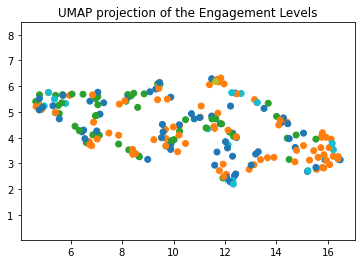

In [47]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in label.values.flatten()])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Engagement Levels', fontsize=12)